## EAS 503 Homework 3 Submission
Name - _Yujia Lian_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - October 31, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 2 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))


In [4]:
#Enter your solution here
from datetime import datetime as dt
import pandas as pd
crime_data = pd.read_csv('chicago_crime_data.csv')
crime_data_sort = crime_data.sort_values('Primary Type ID')
primary_type_id = pd.read_csv('primary_type_id.csv')
crime_data_merge = pd.merge(crime_data_sort,primary_type_id, on="Primary Type ID")
crime_data_merge.to_csv('crime_data_merge.csv')
each_crime_total = {}
for i in primary_type_id['Primary Type ID']:
    each_crime_total[i] = crime_data_merge.loc[crime_data_merge['Primary Type ID'] == i]
high_frequency_crime_total = dict((k, v) for k, v in each_crime_total.items() if len(v) > 10000)

/Users/yujialian/Library/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


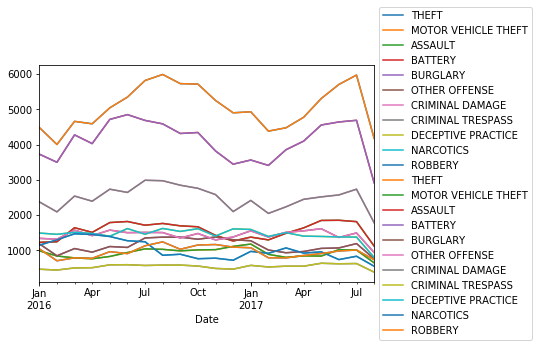

In [6]:
from pandas import Series
from matplotlib import pyplot
crime_sorted ={}
date_with_count = {}
for i in high_frequency_crime_total.keys():
    crime_sorted[i] = high_frequency_crime_total[i].sort_values('Date')
    high_frequency_crime_total[i]['Date'] = pd.to_datetime(high_frequency_crime_total[i].Date)
    per = high_frequency_crime_total[i].Date.dt.to_period("M")
    date_with_count[i] = high_frequency_crime_total[i].groupby(per).describe()
    date_with_count[i] = high_frequency_crime_total[i].groupby(per).describe()["Crime_ID"]["count"]
    crime_type = str(high_frequency_crime_total[i]['Primary Type'].values[0])
    date_with_count[i].plot(x = list(date_with_count[i].index.to_series().astype(str)), y = date_with_count[i].values, legend=True, label = crime_type)
pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pyplot.show()

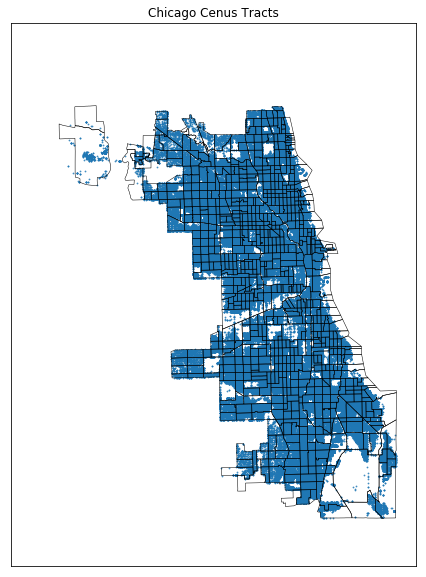

In [4]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt#Import error, solved it by conda install basemap, there's some import error, but after
#restart everything, it turns out to be fine.
fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
#llcrnrlat:latitude of lower left hand corner of the desired map domain (degrees).
#urcrnrlat:latitude of upper right hand corner of the desired map domain (degrees).
#llcrnrlon: longitude of lower left hand corner of the desired map domain (degrees).
#urcrnrlon:longitude of upper right hand corner of the desired map domain (degrees).
#lat_ts: latitude of true scale.
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
#Plot the points
x = []
y = []
for i in crime_sorted.keys():
    crime_sorted[i].fillna(method='ffill', inplace=True)
for i in crime_sorted.keys():
    for j in range(len(crime_sorted[i]['Longitude'])):
        lons = [crime_sorted[i]['Longitude'].values[j],crime_sorted[i]['Longitude'].values[j]]
        lats = [crime_sorted[i]['Latitude'].values[j],crime_sorted[i]['Latitude'].values[j]]
        x0,y0 = m(lons,lats)
        x.append(x0)
        y.append(y0)
plt.scatter(x,y,alpha=0.5,s=0.5)
plt.title("Chicago Cenus Tracts")
plt.show()

##### Problem 2 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

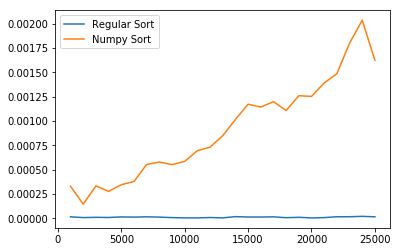

In [15]:
#Enter your solution here
import numpy as np
import matplotlib.pyplot as plt
import time
A = []
B = []
regular_operation_time = []
numpy_operation_time = []
x = []
for i in range(1000, 25001, 1000):
    B = np.random.random((1, i))
    before1 = time.time()
    np.sort(B)
    after1 = time.time()
    numpy_operation_time.append(after1 - before1)
    before2 = time.time()
    sorted(B)
    after2 = time.time()
    regular_operation_time.append(after2 - before2)
    x.append(i)
plt.plot(x,regular_operation_time, label = "Regular Sort")
plt.plot(x,numpy_operation_time, label = "Numpy Sort")
plt.legend(loc='upper left')
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
from itertools import permutations
A = []
B = []
regular_operation_time = []
numpy_operation_time = []
x = []
def det(matrix, d):
    if d == 1:
        return matrix[0][0]
    else:
        first = matrix.pop(0)
        #print("!")
        subdet = 0
        for i in range(d):
            subn = copy.deepcopy(matrix)
            for j in subn:
                j.pop(i)
            if i % 2 != 0:
                subdet -= first[i] * det(subn, d - 1)
            else:
                subdet += first[i] * det(subn, d - 1)
        return subdet

for i in range(1, 15, 5):
    print(i)
    B = np.random.random((i, i))
    before1 = time.time()
    temp = B.tolist()
    det(temp, i)
    after1 = time.time()
    regular_operation_time.append(after1 - before1)
    before2 = time.time()
    np.linalg.det(B)
    after2 = time.time()
    numpy_operation_time.append(after2 - before2)
    x.append(i)

plt.plot(x,regular_operation_time, label = "Regular")
plt.plot(x,numpy_operation_time, label = "Numpy")
plt.legend(loc='upper left')
plt.show()

1
6
11


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
A = []
B = []
regular_operation_time = []
numpy_operation_time = []
x = []
def regular_matrix_mul(A, B):
    num_cols_A = np.shape(A)[1]
    num_rows_A = np.shape(A)[0]
    num_rows_B = np.shape(B)[0]
    num_cols_B = np.shape(B)[1]
    if(num_cols_A != num_rows_B):
        print("The two matrix's dimension does not fufill the matrix multiply requirement, operation fail!")
        return
    res = np.zeros((num_rows_A, num_cols_B))
    for i in range(num_rows_A):
        #temp = 0
        for j in range(num_cols_B):
            temp_sum = 0
            for k in range(num_cols_A):
                temp_sum  = temp_sum + A[i][k] * B[k][j]
            res[i][j] = temp_sum
    return res
for i in range(100, 1500):
    A = np.random.random((i, i))
    before1 = time.time()
    regular_matrix_mul(A, A)
    after1 = time.time()
    regular_operation_time.append(after1 - before1)
    before2 = time.time()
    np.matmul(A, A)
    after2 = time.time()
    numpy_operation_time.append(after2 - before2)
    x.append(i)
plt.plot(x,regular_operation_time, label = "Regular Multiply operation")
plt.plot(x,numpy_operation_time, label = "Numpy multiply operation")
plt.legend(loc='upper left')
plt.show()